In [370]:
import pandas as pd
import numpy as np
#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

### 1. Code to import the table

In [371]:
df=pd.read_excel("ModelingDataSet.xlsx",sheetname="Transactions")

In [361]:
df.head()

,Transaction_ID,Unit_cost,Quantity,Extended_cost,Revenue,Margin%
0,1,0.261167,1200,313.40,468.00,0.330341
1,2,1.073075,400,429.23,572.00,0.249597
2,3,0.109778,2880,316.16,662.88,0.523050
3,4,0.007200,24000,172.80,288.00,0.400000
4,5,0.012630,10000,126.30,320.00,0.605312


In [362]:
display(df.describe())
display(df.info())

,Transaction_ID,Unit_cost,Quantity,Extended_cost,Revenue,Margin%
count,28103.000000,28103.000000,28103.000000,28103.000000,28103.000000,28103.000000
mean,14052.000000,0.210462,5556.689820,276.245760,381.811127,0.411105
std,8112.781644,0.473328,16631.417435,622.663652,790.691345,0.217018
min,1.000000,0.000008,5.000000,0.020000,4.890000,0.091326
25%,7026.500000,0.025100,200.000000,22.500000,57.750000,0.178685
50%,14052.000000,0.109778,1150.000000,86.400000,150.000000,0.443076
75%,21077.500000,0.249111,5000.000000,310.650000,427.200000,0.610069
max,28103.000000,45.849321,600000.000000,21634.120000,28938.000000,0.999927


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28103 entries, 0 to 28102
Data columns (total 6 columns):
Transaction_ID    28103 non-null int64
Unit_cost         28103 non-null float64
Quantity          28103 non-null int64
Extended_cost     28103 non-null float64
Revenue           28103 non-null float64
Margin%           28103 non-null float64
dtypes: float64(4), int64(2)
memory usage: 1.3 MB


None

##### Checking for outliers

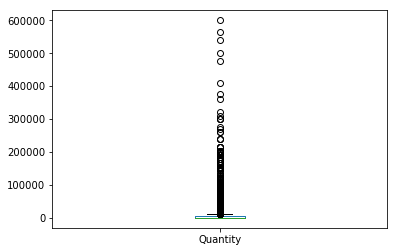

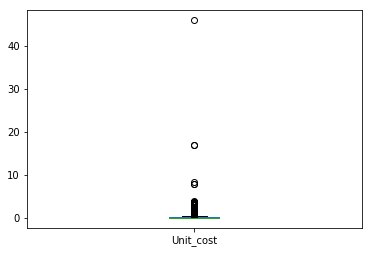

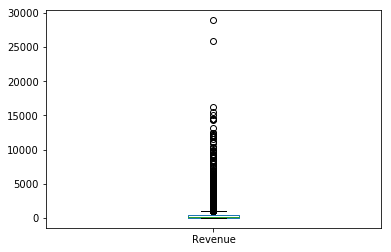

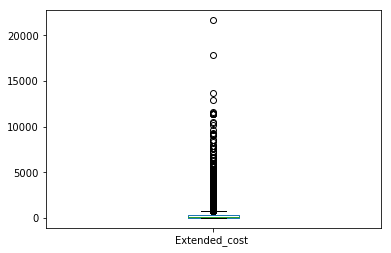

In [363]:
df["Quantity"].plot.box()
plt.figure()
df["Unit_cost"].plot.box()
plt.figure()
df["Revenue"].plot.box()
plt.figure()
df['Extended_cost '].plot.box()

In [364]:
# cost=pd.qcut(df['Extended_cost '], 8, labels=False)


In [365]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [366]:
from sklearn.model_selection import train_test_split


## 2.a,b  
## Segmentation of extended cost,classification,changing number of bins, average margin %

Used Decision tree as classification model, first for that we have to convert extended cost into variables by binning. I putted the no. of bins under the loop which will show the accuracy for different no. bin

In [368]:
for i in range(3,7):
    df['cost']=pd.qcut(df['Extended_cost '], i, labels=False)
    X_train, X_test, y_train, y_test= train_test_split(df.drop('Extended_cost ', axis=1),cost, test_size=0.40)
    model=DecisionTreeClassifier()
    model.fit(X_train,y_train)
    prediction1=model.predict(X_test)
    print('Accuracy when bins =',i,':',metrics.accuracy_score(prediction1,y_test))
    print('avg. margin of different bins' , df.groupby(['cost'])['Margin%'].mean())



Accuracy when bins = 3 : 0.988703077744
avg. margin of different bins cost
0    0.612853
1    0.401740
2    0.218721
Name: Margin%, dtype: float64
Accuracy when bins = 4 : 0.992439067782
avg. margin of different bins cost
0    0.620402
1    0.511114
2    0.298965
3    0.208383
Name: Margin%, dtype: float64
Accuracy when bins = 5 : 0.985678704857
avg. margin of different bins cost
0    0.624298
1    0.575717
2    0.397673
3    0.253365
4    0.203965
Name: Margin%, dtype: float64
Accuracy when bins = 6 : 0.987724604163
avg. margin of different bins cost
0    0.623481
1    0.601885
2    0.473077
3    0.324586
4    0.235011
5    0.202347
Name: Margin%, dtype: float64


## 2.c.
## Corelation matrix

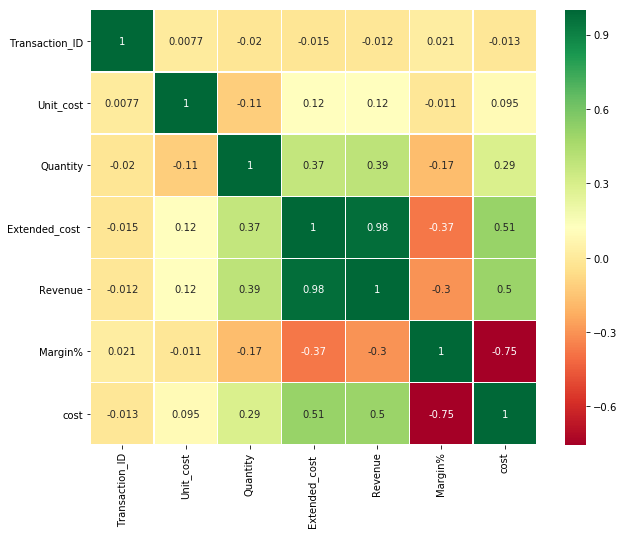

In [369]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Margin with cost can help me to differentiate the margin even better